# Speech Generator with RNNs

## Recurrent Neural Network Based Language Models

The RNNLM is useful in that it allows us to apply likelihoods to words and sentences, then lets us take it a step further by providing functionality in generating new text. 

### The Recurrent Neural Network

A recurrent neural network differs from feedforward neural networks in that it has internal state with its units in the form of a directed cycle. That means that recurrent neural networks can take the input not just as the current input *but also the example prior to it*.  

Thus recurrent neural networks have two sources of input: the present and the recent past. The decision at time step `t-1` will affect the decision at time step `t`.  

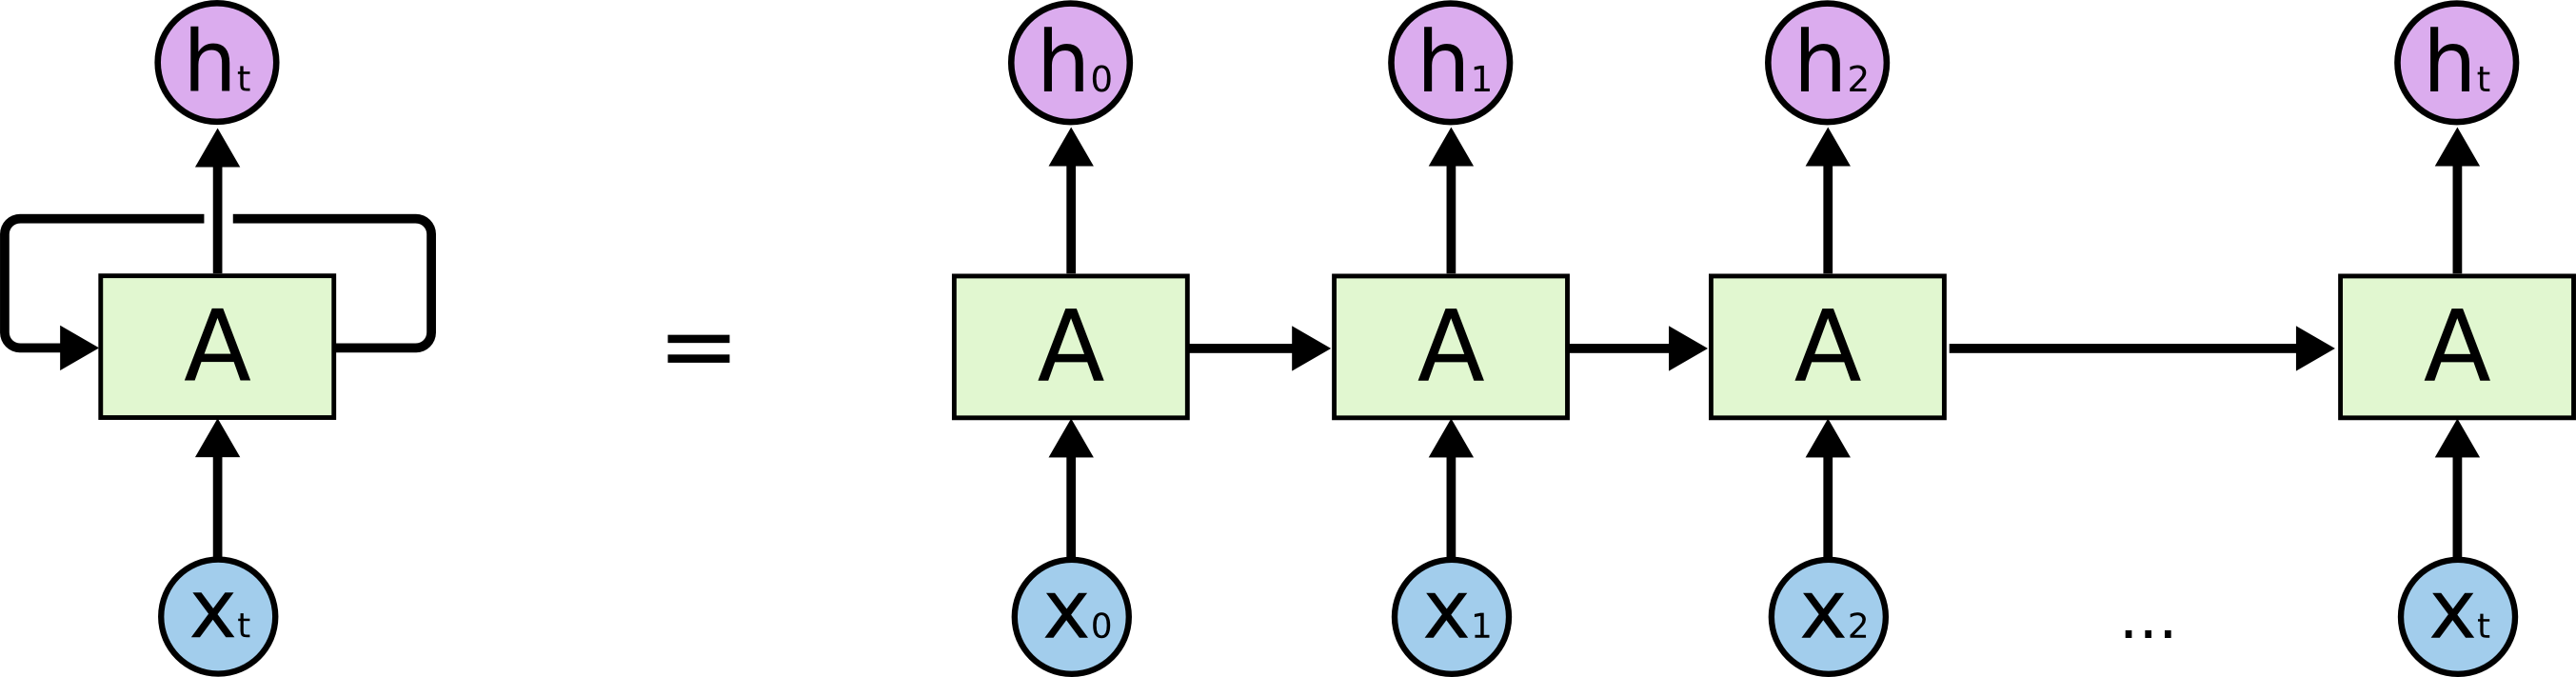

In [1]:
from IPython.display import Image
Image(filename='../images/RNN-unrolled.png')

The diagram above shows on the right side that every iteration of the neural network will be passing its result to the next iteration of the neural network. Thus example $x_1$ will operate according to the values in example $x_1$ and the result $h_0$. This can be rolled up into the left-hand side as a feedback loop. 

This arrangement indicates that RNNs are especially suitable for dealing with examples as sequences. A lot of training data may consist of independent points but some training data (such as a paragraph of words) may be related by sequence. RNNs are very appropriate for dealing with that sort of data.

Now that we know how they function we can think about how we might implement an RNN. We can't simply use backpropogation since a recurrent neural network has a cyclical dependency. A requirement of backpropogation is that  the neural network be acyclic so that it can clearly go from output back to input. With an RNN there is a cycle in order to feed the output back to input so that just won't cut it. 

**Backpropogation Through Time (BPTT)**

This is a variation of backprogation to allow us to account for the fact that the RNN is cyclic. This [article](https://deeplearning4j.org/lstm) covers BPTT and how to fix various other problems commonly associated with recurrent neural networks. 

### RNN Effectiveness

The link [here](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) describes a little of how RNNs can be used effectively. Let's quickly do an overview of examples they provide:

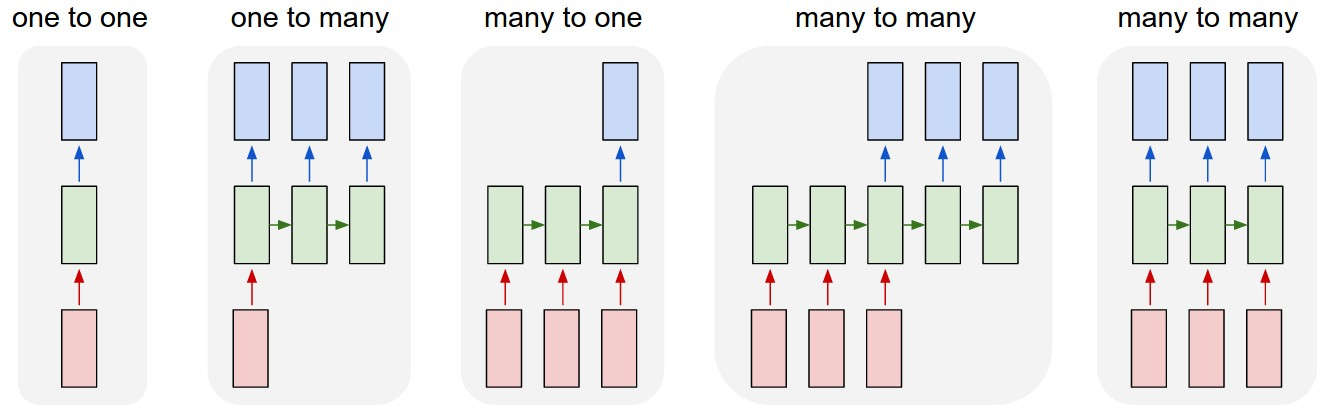

In [2]:
Image(filename='../images/diags.jpeg')

Note that input vectors are red, output vectors are blue and green is the RNN's state. 

**One to One**. Vanilla approach to neural networks (i.e. without RNN).
**One to Many**. Sequence output. One input vector will produce a sequence. Such as an image producing a sequence of words. 
**Many to One**. Sequence input. Such as taking a sequence of words and identifying sentiment (i.e. happy, sad, etc).
**Many to Many**. Sequence input *and* sequence output. Such as taking a sequence of words in English and translating to a sequence of words in French.
**Many to Many (2)**. Synced sequence input and output. Such as video classification where we label each frame of the video. 

There's also an interesting approach to using RNNs with models that are not necessarily sequenced in any way inherently discussed further in the article.

### RNNLM

We can start by understanding that probability of a sentence that consists of worods $w_1,...w_n$ as:

\begin{align}
P(w_1,...,w_n) = \prod_{i=1}^n P(w_i \space | \space w_1,...,w_{i-1})
\end{align}

The probability of a sentence is thus the probality that $w_2$ occurs given $w_1$ occurs, then $w_3$ occurs giveen $w_2$ and $w_1$ occurred and so on. This is useful as it provides us a scoring mechanism for likelihood of a word occurring. This also let's us approach the problem of generating new text. 

In [3]:
import numpy as np

# Matplot lib setup
import matplotlib.pyplot as plt
%matplotlib inline

#### LSTM 

The recurrent neural network model we discussed above are extremely useful since they can use recent iterations in order to support the decision behind the current iteration. However, one flaw behind them is that in scenarios where the context we want to use for the current iteration is a huge amount of iterations behind we're going to result in a very slow RNN.

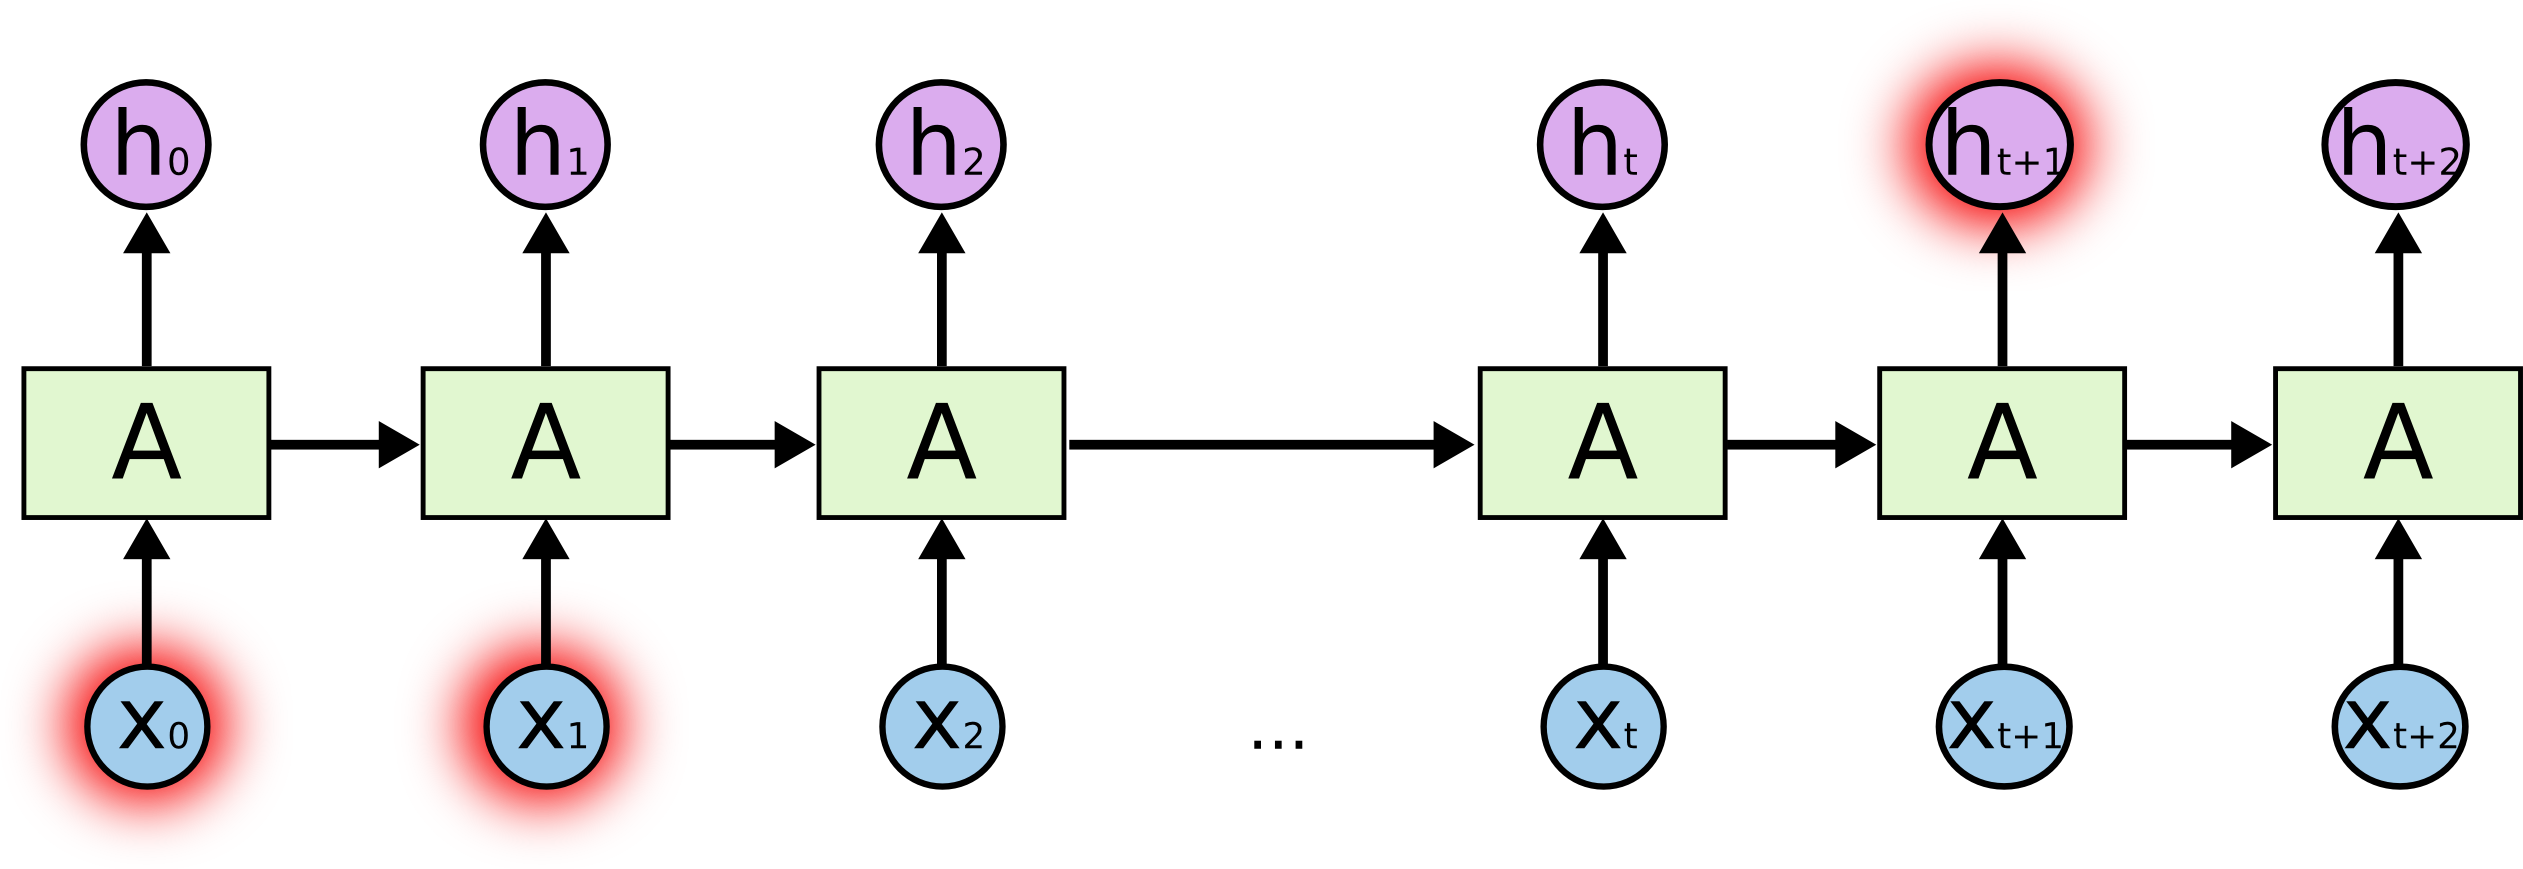

In [4]:
Image(filename="../images/RNN-longtermdependencies.png")

In order to get around this we can use LSTM (Long Short Term Memory) networks, which are designed specifically to solve the long-term dependency we outlined above.

Take a standard RNN where layes $h_{t+1}$ and $h_{t-1}$ are seperated by a single layer $h_t$. Each layer in the neural network, $h_i$, will have a simple structure for its calculations i.e. $tanh$.

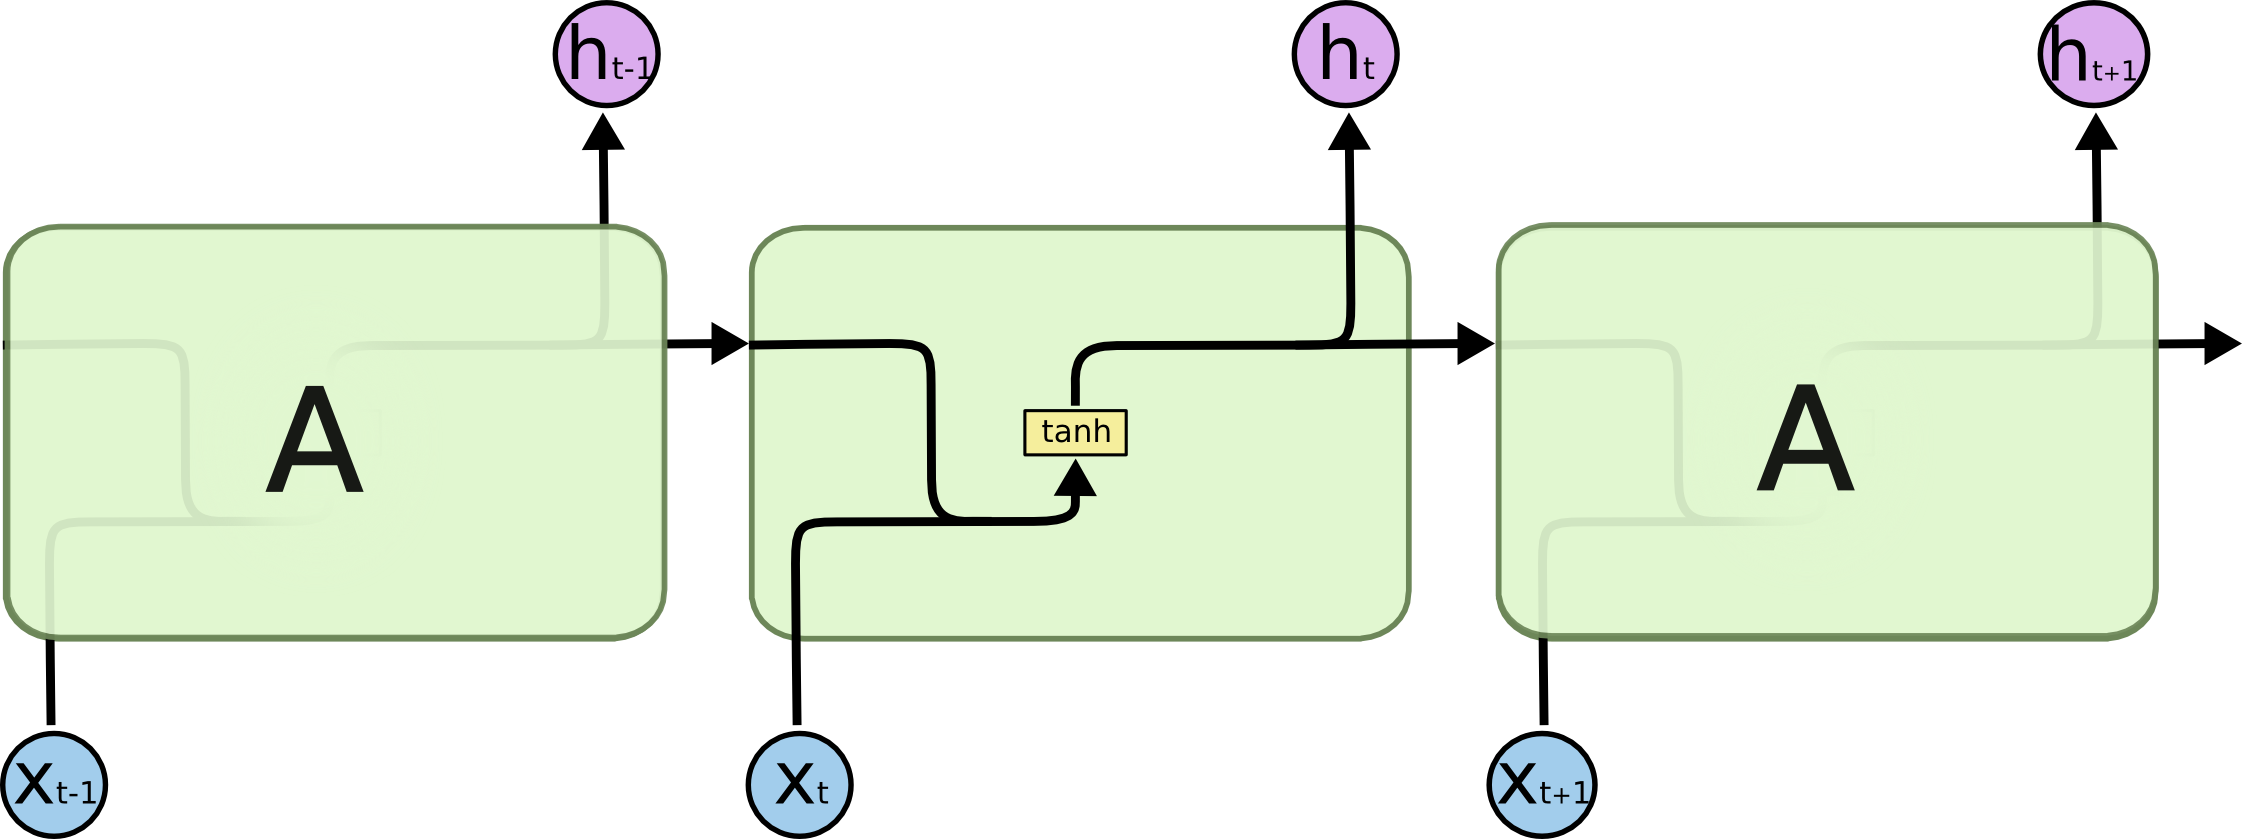

In [5]:
Image(filename="../images/LSTM3-SimpleRNN.png")

LSTMs introduce a vastly different structure for each layer, meant to help with long-term dependencies:

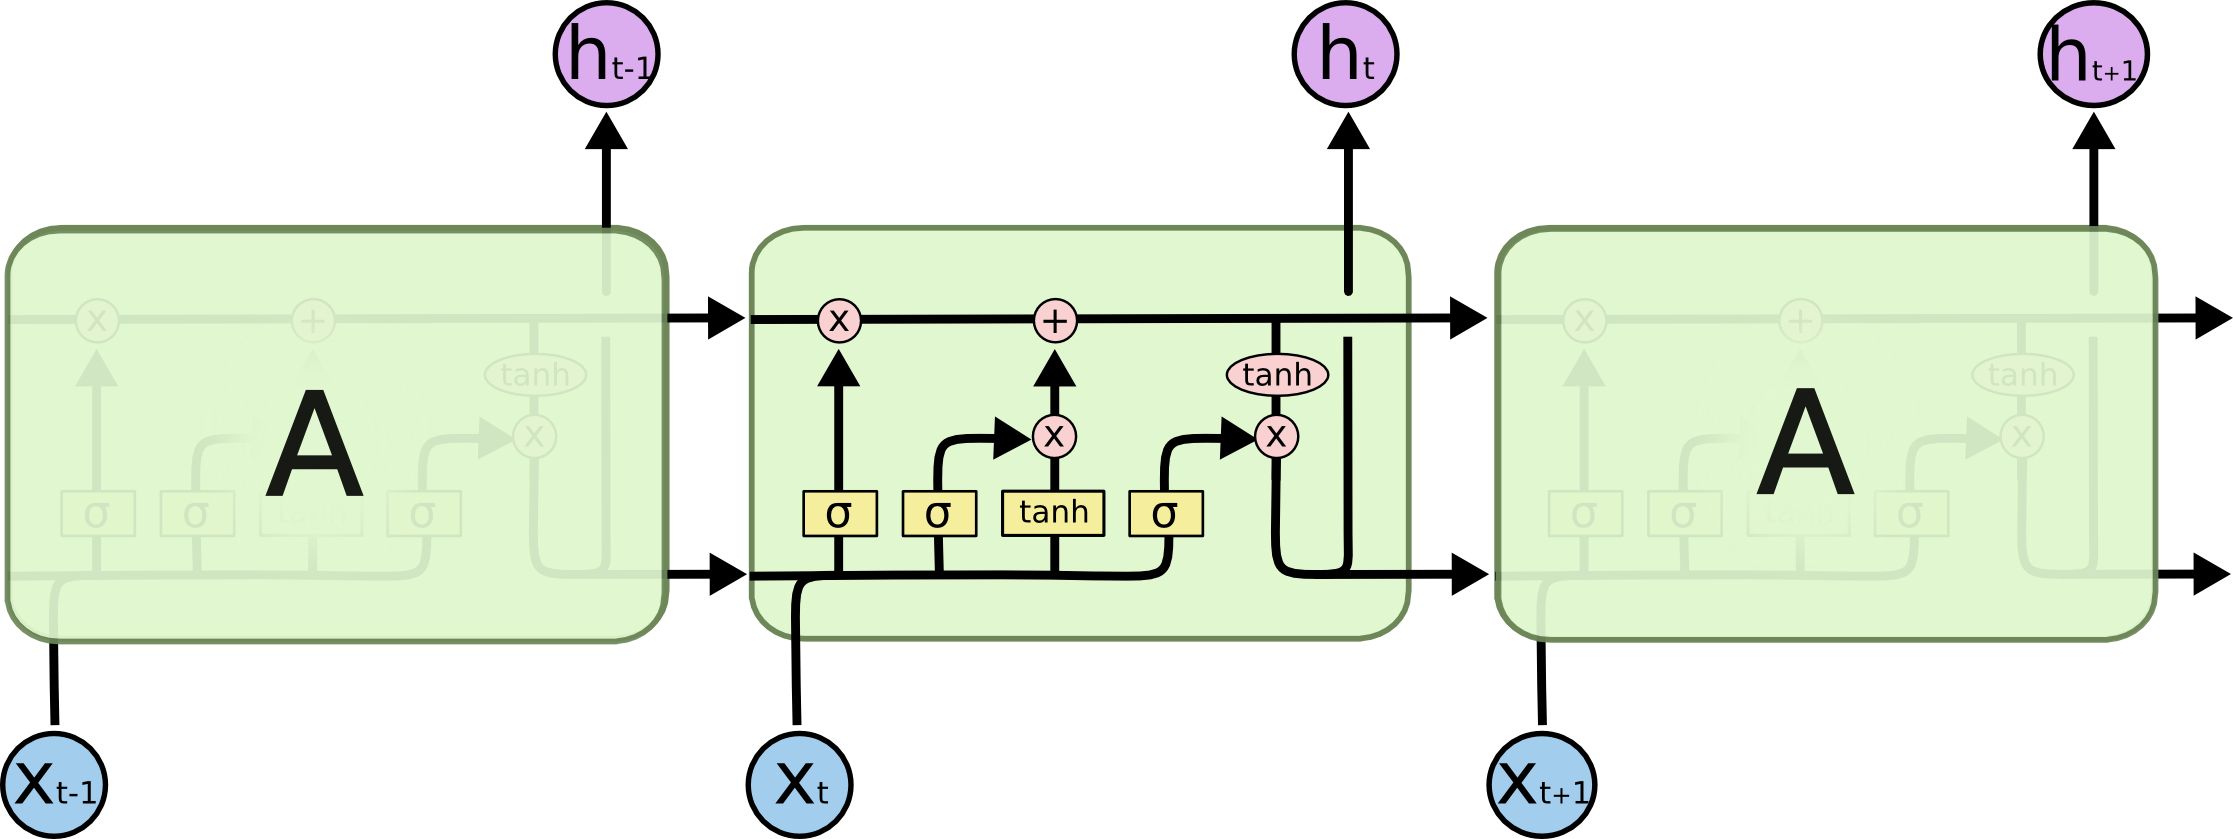

In [6]:
Image(filename="../images/LSTM3-chain.png")

This is a complex structure so let's try to get through it step by step.

**The Cell State**

The cell state is the horizontal line running straight through the top of the structure. It can be described as a conveyer belt as it runs straight through the entire chain. It's the reason that the LSTM can pass data so easily from a long, long time ago to the current iteration.

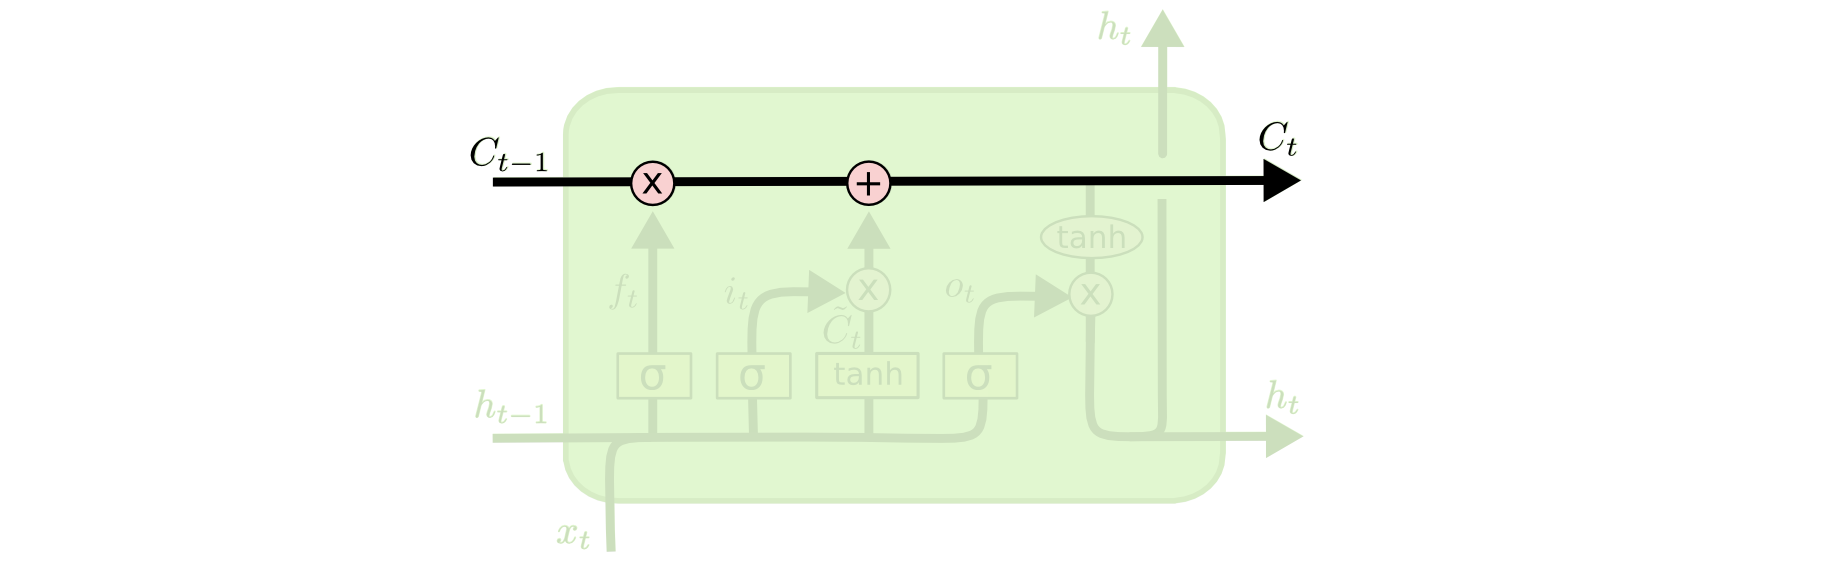

In [7]:
Image(filename="../images/LSTM3-C-line.png")

Now we can note that the cell state is actually editable, as can be seen by the two pink circles which we'll refer to as *gates*. 

#### Step by Step Walkthrough of an LSTM

**$1$. Should I keep information in the cell state? The Forget Gate Layer.**

This sigmoid layer will look at $h_{t-1}$ and $x_t$, then output a number of either $0$ and $1$ to every number in the cell state $C_{t-1}$. A $1$ will indicate "completely keep this" while a 0 will say "completely get rid of this".

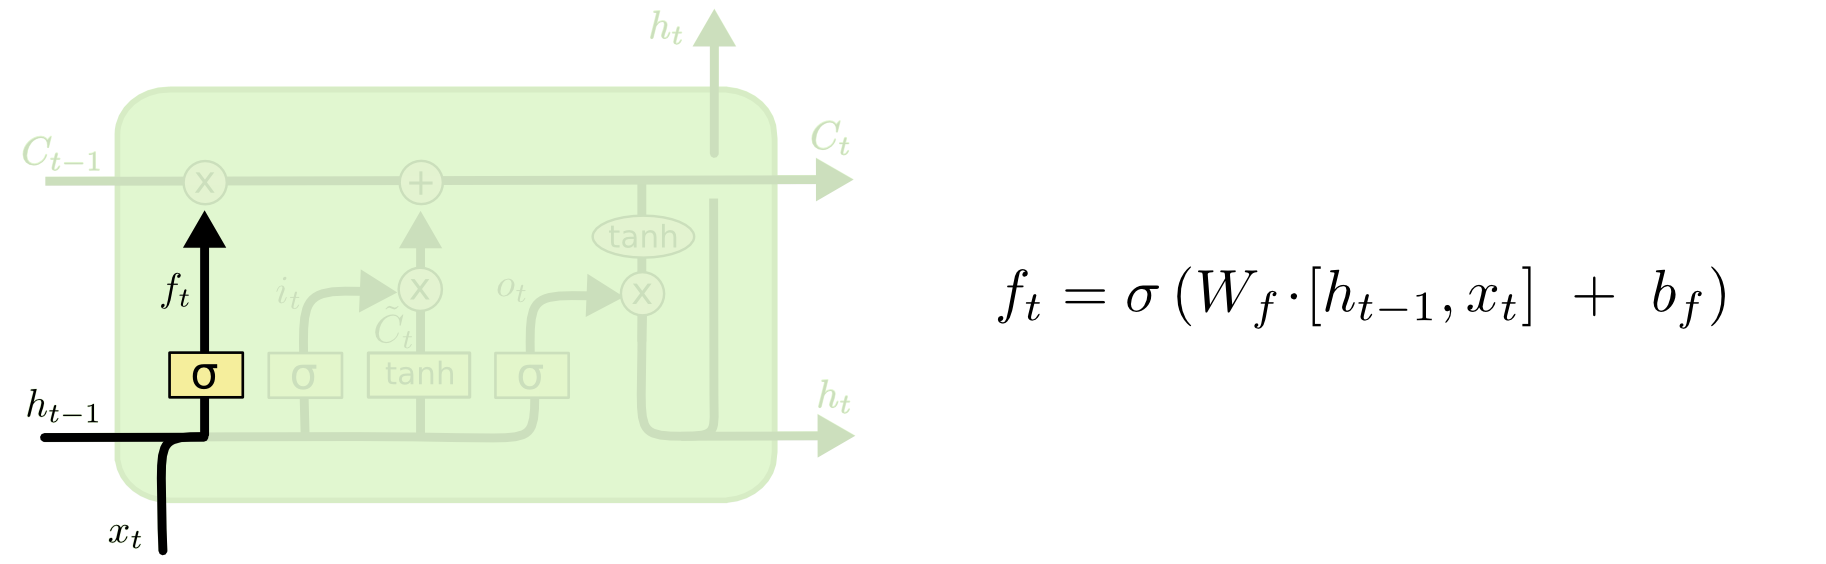

In [8]:
Image(filename="../images/LSTM3-focus-f.png")

**$2$. Decide which new information to store in the cell state**.

First we have a sigmoid layer called the "input gate layer" which is going to tell us whether or not we want to update the number. This will correspond to the Forget Gate Layer. Next, a $tanh$ layer will create a vector for the new candidate for the number in the cell state.

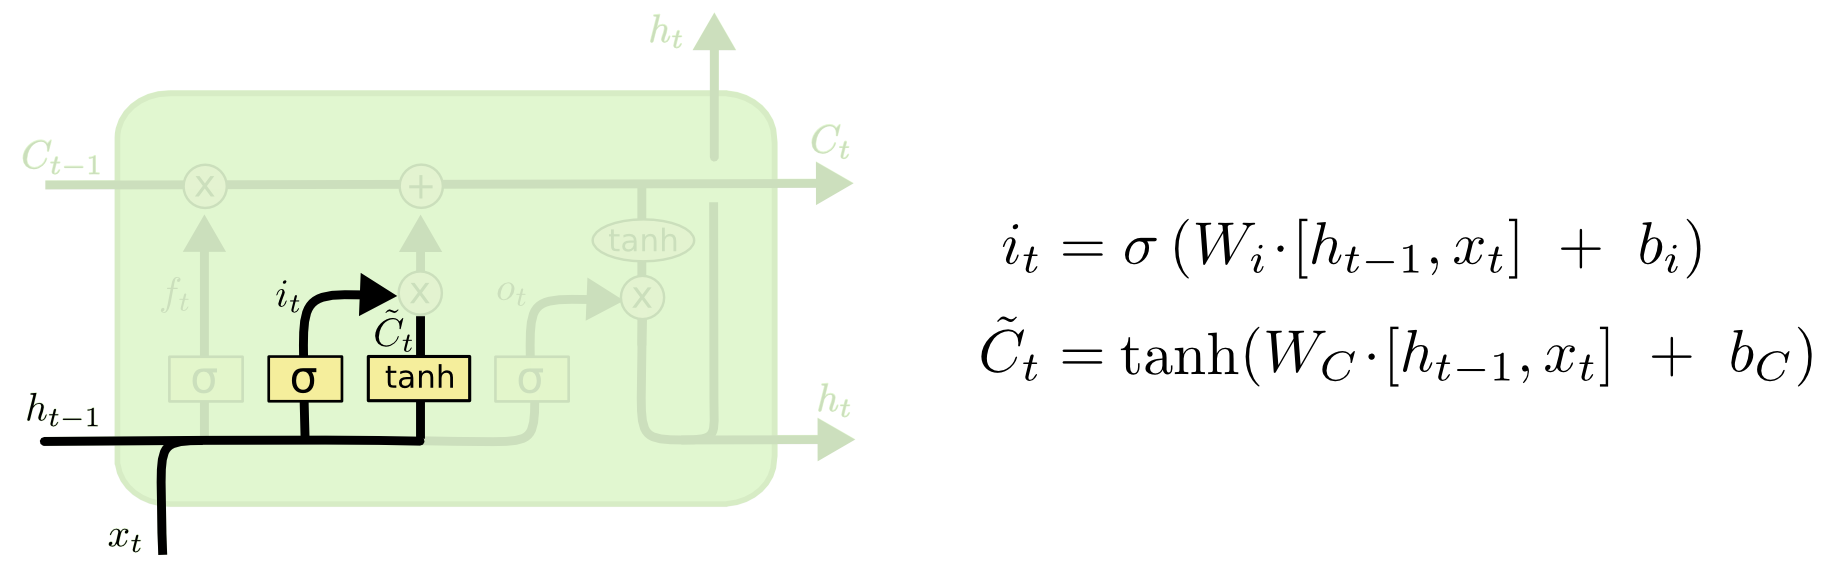

In [9]:
Image(filename="../images/LSTM3-focus-i.png")

Now we can take the last step forward and update the old state $C_{t-1}$ with the new state $C_t$. 

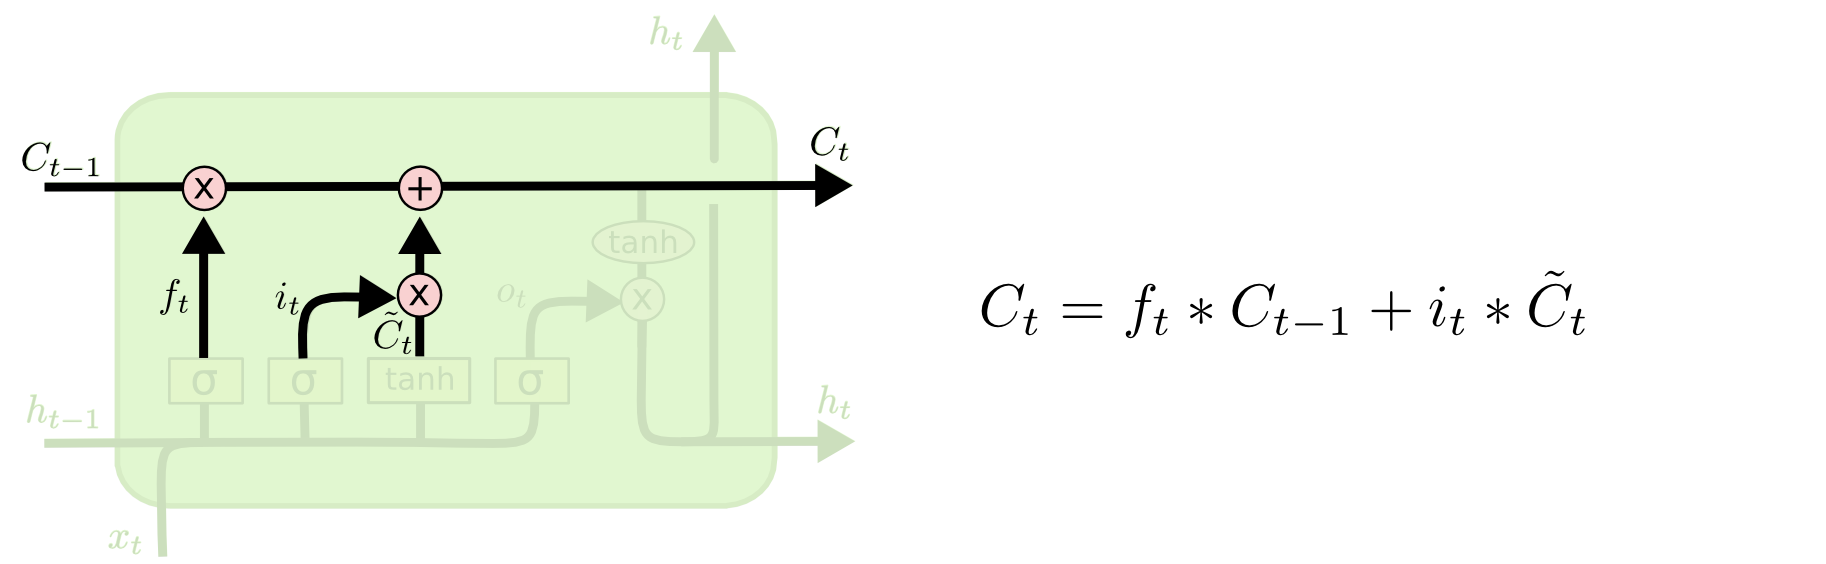

In [10]:
Image(filename="../images/LSTM3-focus-C.png")

Lastly we need to output the results of this layer. This is similar to how we did it in the ordinary RNN. We have a $tanh$ layer that will emit the output. However, prior to this we multiply by a sigmoid layer so we only output the parts we decide to output. 

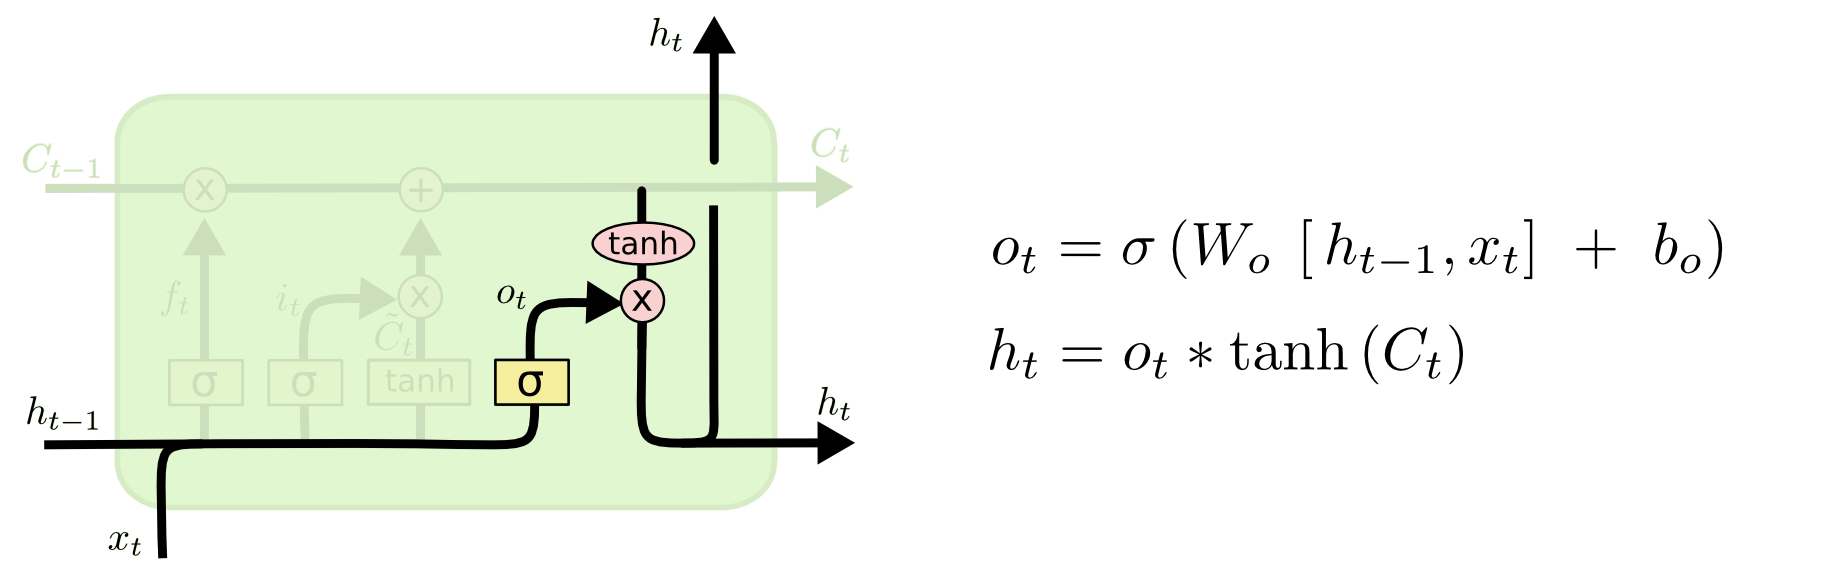

In [11]:
Image(filename="../images/LSTM3-focus-o.png")

There are a few variations to the LSTM above. Often in a project we find ourselves needing to use a different version of the LSTM. Regardless the core concept should be present in our minds so we can proceed in the implementation.